<h1 style='color:#065164; font-size:45px'><center>Loan Amount Prediction</center></h1>

<h1 style='color:#065164; font-size:35px'><center>Apply Linear Regression</center></h1>

<h2 style='color:#065164'>1. Import Dependencies</h2>

In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#set bc seaborn as the defualt
#sns.set_theme()

import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics

<h2 style='color:#065164'>2. Loan Dataset</h2>

In [2]:
#set full display all features
pd.set_option('display.max_columns', None)
data = pd.read_csv('loan_status_prediction_dataset.csv')
data.head(3)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h2 style='color:#065164'>3. Data Wrangling & Preprocessing</h2>

In [4]:
print("Number Of Dimension:", data.shape[1])
print("*" * 50)
print("Number Of Samples:", data.shape[0])

Number Of Dimension: 47
**************************************************
Number Of Samples: 128258


In [5]:
data.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128258 entries, 0 to 128257
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       128258 non-null  int64  
 1   loan_amnt                128258 non-null  int64  
 2   funded_amnt              128258 non-null  int64  
 3   funded_amnt_inv          128258 non-null  int64  
 4   term                     128258 non-null  object 
 5   int_rate                 128258 non-null  object 
 6   installment              128258 non-null  float64
 7   grade                    128258 non-null  object 
 8   sub_grade                128258 non-null  object 
 9   emp_title                109087 non-null  object 
 10  emp_length               117027 non-null  object 
 11  home_ownership           128258 non-null  object 
 12  annual_inc               128258 non-null  float64
 13  verification_status      128258 non-null  object 
 14  issu

In [7]:
#check missing value if there are any missing data.
missing_value = data.isnull().sum()
percent_missing_value = missing_value / len(data)
print("*" * 50)
print("Missing value:", missing_value)
print("*" * 50)
print("Pecent of Missing value:", percent_missing_value)

**************************************************
Missing value: id                              0
loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                   19171
emp_length                  11231
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                           231
delinq_2yrs                     0
earliest_cr_line                0
fico_range_low                  0
fico_range_high                 0
inq_last_6mths                  0
mths_since_last_delinq      72115
mths_since_last_

In [8]:
#Descriptive Statistic
data.describe()
#data.describe(include='all')

,id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,1.282580e+05,128027.000000,128258.000000,128258.000000,128258.000000,128258.000000,56143.000000,12944.000000,128258.000000,128258.000000,1.282580e+05,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.000000,128258.00000,128258.000000,128258.000000,128258.000000
mean,1.616446e+08,16276.080634,16276.080634,16273.393083,470.932802,8.579460e+04,21.066422,0.236710,704.961562,708.961780,0.528918,36.310635,86.693989,11.802094,0.102356,1.786384e+04,23.336416,13574.234968,13572.065368,3527.923225,3527.313842,2613.861391,912.093107,0.18927,1.779427,0.062696,1141.535812
std,1.350068e+06,10281.910603,10281.910603,10281.072014,289.988822,1.031360e+05,19.717719,0.757576,34.976477,34.977355,0.790365,21.772777,23.057294,6.028849,0.308649,2.336172e+04,12.428671,9781.778293,9781.009799,4387.187445,4386.798458,4249.054535,725.410296,2.77064,146.306181,8.518903,3862.617777
min,1.571072e+08,1000.000000,1000.000000,975.000000,30.640000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-9304.140000
25%,1.605352e+08,8400.000000,8400.000000,8400.000000,254.797500,5.000000e+04,12.950000,0.000000,680.000000,684.000000,0.000000,19.000000,71.000000,8.000000,0.000000,6.124000e+03,14.000000,5944.320000,5941.917500,1473.940000,1473.730000,890.777500,370.862500,0.00000,0.000000,0.000000,143.222500
50%,1.616534e+08,14000.000000,14000.000000,14000.000000,396.920000,7.000000e+04,19.270000,0.000000,700.000000,704.000000,0.000000,33.000000,91.000000,11.000000,0.000000,1.203200e+04,21.000000,11383.610000,11380.995000,2396.950000,2396.190000,1497.555000,720.260000,0.00000,0.000000,0.000000,343.240000
75%,1.627605e+08,22525.000000,22525.000000,22525.000000,634.230000,1.000000e+05,26.530000,0.000000,725.000000,729.000000,1.000000,52.000000,106.000000,15.000000,0.000000,2.180700e+04,30.000000,19627.445000,19623.107500,3971.155000,3970.850000,2552.447500,1257.157500,0.00000,0.000000,0.000000,628.490000
max,1.641932e+08,40000.000000,40000.000000,40000.000000,1671.880000,9.682505e+06,999.000000,23.000000,845.000000,850.000000,5.000000,161.000000,119.000000,104.000000,5.000000,1.678904e+06,145.000000,39581.240000,39581.240000,45537.600000,45537.600000,40000.000000,7011.280000,142.29000,23040.000000,1557.468000,41557.180000


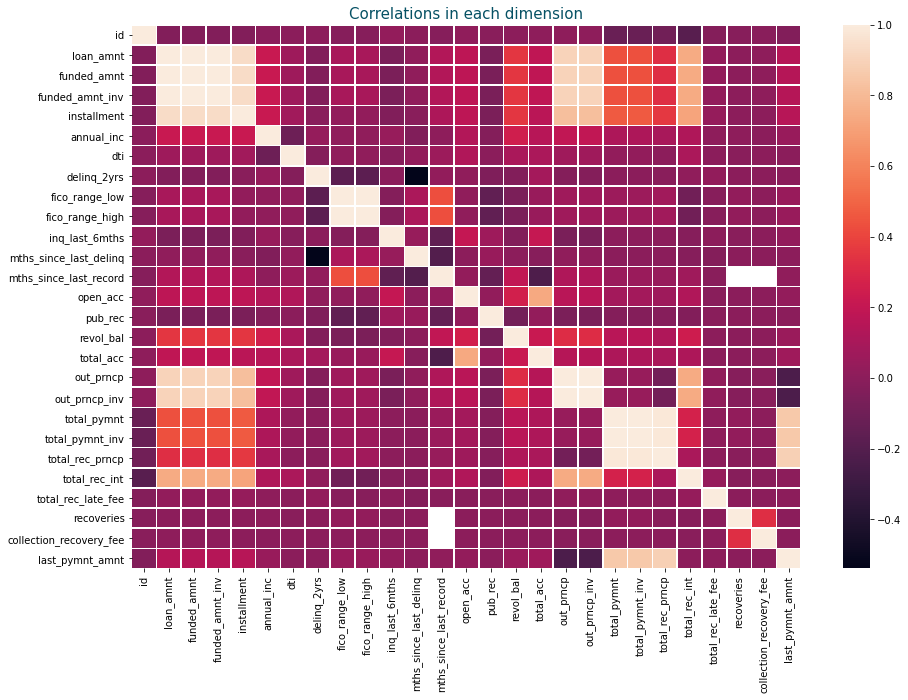

In [8]:
correlations = data.corr(method='pearson')
#we wanna show u via heatmap
#we use seaborn library to visualize (heatmap)
plt.subplots(figsize=(15,10))
sns.heatmap(correlations, 
           xticklabels=correlations.columns.values,
           yticklabels=correlations.columns.values,linewidths=.5)
           #, height=5, aspect=11/4)
plt.title('Correlations in each dimension', fontsize='15', color='#065164')
plt.show()

In [9]:
#rename features
data.rename(columns={
    'id':'id',
    'loan_amnt' : 'loan_amount',  
    'funded_amnt':'funded_amount',
    'funded_amnt_inv':'funded_amount_investor',
    'term':'term',
    'int_rate': 'interest_rate',
    'installment':'installment',
    'grade':'loan_grade',
    'sub_grade':'loan_sub_grade',
    'emp_title':'borrower_job_title',
    'emp_length':'borrower_length_expereince',
    'home_ownership':'home_ownership',
    'annual_inc':'borrower_annual_income',
    'verification_status':'loan_verification_status',
    'issue_d':'date_loan_funded',
    'loan_status':'loan_status',
    'purpose':'borrower_purpose',
    'title':'loan_title',
    'zip_code':'borrower_zip_code',
    'addr_state':'address_state',
    'dti':'debt_to_income',
    'delinq_2yrs':'borrower_delinquency_last_2y',
    'earliest_cr_line':'date_credit_line_open',
    'fico_range_low':'fico_rage_low',
    'fico_range_high':'fico_range_high',
    'inq_last_6mths':'number_inquiry_last_6mo',  
    'mths_since_last_delinq':'borrower_delinquency_last_6mo',
    'mths_since_last_record':'borrower_delinquency_public_record',  
    'open_acc':'number_credit_line',
    'pub_rec':'number_deliquency_public_record',
    'revol_bal':'credit_revolve_balance', 
    'revol_util':'credit_revolve_utilization',   
    'total_acc':'total_credit_line',  
    'initial_list_status':'initial_list_status',  
    'out_prncp':'outstanding_principal', 
    'out_prncp_inv':'outstanding_pricipal_investor', 
    'total_pymnt':'total_payment',
    'total_pymnt_inv':'total_payment_investor',
    'total_rec_prncp':'total_receive_principal',
    'total_rec_int':'total_receive_investor',
    'total_rec_late_fee':'toal_receive_late_fee',
    'recoveries':'recoveries',
    'collection_recovery_fee':'collection_recovery_fee',
    'last_pymnt_d':'last_payment_date', 
    'last_pymnt_amnt':'last_payment_amount',
    'next_pymnt_d':'next_payment_date',
    'last_credit_pull_d':'last_credit_pull_date'                    
}, inplace=True)
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36 months,17.74%,180.12,C,C5,Lead Mtc Tech,2 years,RENT,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128xx,NY,15.17,0,May-08,685,689,1,NaN,NaN,4,0,2453,81.80%,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36 months,12.40%,668.12,B,B4,NaN,< 1 year,RENT,13000.0,Verified,Dec-19,Current,small_business,Business,986xx,WA,79.59,0,Dec-10,665,669,2,NaN,94.0,6,1,12325,59.30%,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60 months,15.24%,789.24,C,C2,Financial Analyst,10+ years,MORTGAGE,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480xx,MI,35.07,0,Dec-88,695,699,0,NaN,NaN,26,0,79282,46.40%,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


In [10]:
#Change datatype some dimensions
#we need to convert some dimension to string type before using str.replace() function
data.interest_rate = data.interest_rate.astype(str)
data['interest_rate'] = data['interest_rate'].str.replace('%','').astype(float)
data.term = data.term.astype(str)
data['term'] = data['term'].str.replace('months','').astype(int)
data.credit_revolve_utilization = data.credit_revolve_utilization.astype(str)
data['credit_revolve_utilization'] = data['credit_revolve_utilization'].str.replace('%','').astype(float)

#borrower_length_expereince, borrower_zip_code
data.borrower_length_expereince = data.borrower_length_expereince.astype(str)

data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('year','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('<','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('+','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('s','')
data['borrower_length_expereince'] = data['borrower_length_expereince'].str.replace('nan','0')

data["borrower_delinquency_last_6mo"] = data["borrower_delinquency_last_6mo"].fillna(0)
data["borrower_delinquency_public_record"] = data["borrower_delinquency_public_record"].fillna(0)
data["credit_revolve_utilization"] = data["credit_revolve_utilization"].fillna(0)
data["borrower_length_expereince"] = data["borrower_length_expereince"].fillna(0)
data["borrower_job_title"] = data["borrower_job_title"].fillna(0)

data.borrower_zip_code = data.borrower_zip_code.astype(str)
data['borrower_zip_code'] = data['borrower_zip_code'].str.replace('xx','')

In [11]:
total_sample = data.shape[0]
duplicate_sample = data.duplicated(subset=['id', 'loan_amount','borrower_job_title'], keep='first')
count_duplicate_sample = duplicate_sample.value_counts()

count_duplicate_sample
#False, it means dataset has no duplicate value

False    128258
dtype: int64

In [12]:
#RENT = 1
#MORTGAGE = 2
#OWN = 3
#ANY = 4
data.home_ownership = data.home_ownership.astype(str)
data['home_ownership']  = data['home_ownership'].str.replace('RENT', '1')
data['home_ownership']  = data['home_ownership'].str.replace('MORTGAGE', '2')
data['home_ownership']  = data['home_ownership'].str.replace('OWN', '3')
data['home_ownership']  = data['home_ownership'].str.replace('ANY', '4')

In [14]:
data.head(3)

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,installment,loan_grade,loan_sub_grade,borrower_job_title,borrower_length_expereince,home_ownership,borrower_annual_income,loan_verification_status,date_loan_funded,loan_status,borrower_purpose,loan_title,borrower_zip_code,address_state,debt_to_income,borrower_delinquency_last_2y,date_credit_line_open,fico_rage_low,fico_range_high,number_inquiry_last_6mo,borrower_delinquency_last_6mo,borrower_delinquency_public_record,number_credit_line,number_deliquency_public_record,credit_revolve_balance,credit_revolve_utilization,total_credit_line,initial_list_status,outstanding_principal,outstanding_pricipal_investor,total_payment,total_payment_investor,total_receive_principal,total_receive_investor,toal_receive_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date
0,163477201,5000,5000,5000,36,17.74,180.12,C,C5,Lead Mtc Tech,2,1,50000.0,Source Verified,Dec-19,Current,debt_consolidation,Debt consolidation,128,NY,15.17,0,May-08,685,689,1,0.0,0.0,4,0,2453,81.8,6,f,4619.31,4619.31,713.09,713.09,380.69,332.40,0.0,0.0,0.0,May-20,180.12,Jun-20,May-20
1,164027473,20000,20000,20000,36,12.40,668.12,B,B4,0,1,1,13000.0,Verified,Dec-19,Current,small_business,Business,986,WA,79.59,0,Dec-10,665,669,2,0.0,94.0,6,1,12325,59.3,9,f,19058.87,19058.87,1315.57,1315.57,941.13,374.44,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20
2,164137439,33000,33000,33000,60,15.24,789.24,C,C2,Financial Analyst,10,2,84000.0,Source Verified,Dec-19,Current,credit_card,Credit card refinancing,480,MI,35.07,0,Dec-88,695,699,0,0.0,0.0,26,0,79282,46.4,50,w,31476.80,31476.80,3115.05,3115.05,1523.20,1591.85,0.0,0.0,0.0,May-20,0.00,Jun-20,May-20


<h2 style='color:#065164'>4. Training Model</h2>

In [16]:
#select from features of dataset to build ML model
df = data[['loan_amount','installment', 'term', 'interest_rate','borrower_length_expereince'
                      , 'home_ownership', 'borrower_annual_income', 'number_deliquency_public_record']]

In [17]:
# compute correlation coefficent between variables
pearson_correlation = df.corr(method='pearson')
pearson_correlation

,loan_amount,installment,term,interest_rate,borrower_annual_income,number_deliquency_public_record
loan_amount,1.000000,0.936398,0.362562,-0.059388,0.222528,-0.062312
installment,0.936398,1.000000,0.086756,0.010757,0.220757,-0.057056
term,0.362562,0.086756,1.000000,0.204276,0.027954,-0.008733
interest_rate,-0.059388,0.010757,0.204276,1.000000,-0.057186,0.020834
borrower_annual_income,0.222528,0.220757,0.027954,-0.057186,1.000000,-0.025429
number_deliquency_public_record,-0.062312,-0.057056,-0.008733,0.020834,-0.025429,1.000000


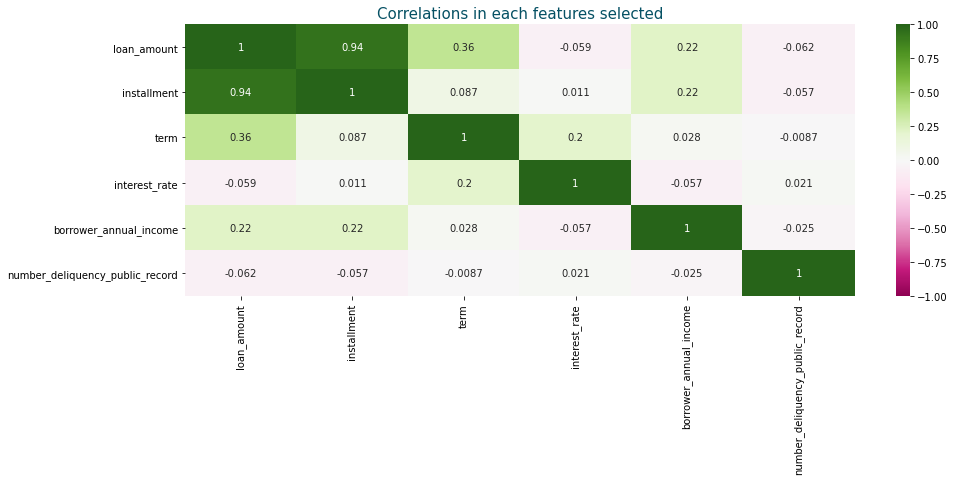

In [18]:
# plot correlation coefficent using heatmap
plt.subplots(figsize=(15,5))
sns.heatmap(pearson_correlation, cmap='PiYG', annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlations in each features selected', fontsize='15', color='#065164')
plt.show()

In [19]:
#Define X,y for train_test_split
X = df.drop(['loan_amount'], axis=1)
y = df['loan_amount']

In [20]:
#Apply train_test_split funtion to random dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [21]:
#set l_model 
l_model = linear_model.LinearRegression()

In [22]:
#Train the model
model = l_model.fit(X_train, y_train)

In [24]:
# learned parameters
weights = model.coef_
bias = model.intercept_

#Linear: y = ax + b
#Linear: y = weight(x)  + Bias

print('We obtained the model parameters as follows:')
print("*" * 50)
for i in weights:
    print(i)
print("*" * 50)
print('Bias: ', bias)

We obtained the model parameters as follows:
**************************************************
32.245860424359485
281.6923170445857
-261.8341264862623
8.733889721905287
25.23562269843718
0.0005014460828896339
-167.19358438612275
**************************************************
Bias:  -7970.306055627556


<h2 style='color:#065164'>5. Model Evaluation</h2>

In [26]:
#Try to prediction
y_prediction = l_model.predict(X_test)

In [28]:
#The result shows
print(y_prediction)

[16396.12197056 22950.37772301 24550.37569808 ... 24718.80993867
 20733.82045224 36145.03521039]


In [30]:
# calculat evaluation measures: mean-square-error and r2-score
mse = metrics.mean_squared_error(y_test, y_prediction)
mae = metrics.mean_absolute_error(y_test, y_prediction)
r2 = metrics.r2_score(y_test, y_prediction)

print('Mean squared error: ', mse)
print("*" * 50)
print('Mean absolute error: ', mae)
print("*" * 50)
print('R2 score: ', r2)

Mean squared error:  2783078.0176588804
**************************************************
Mean absolute error:  1157.3414487694038
**************************************************
R2 score:  0.9734985138040317


In [31]:
#Check train data score of model
train_score = l_model.score(X_train, y_train)

In [33]:
print("Model Score:", train_score)
print("*" * 50)
print("Model Score (%) :", train_score * 100)

Model Score: 0.9735124693353301
**************************************************
Model Score (%) : 97.351246933533


In [34]:
#Check test data score of model
test_score = l_model.score(X_test, y_test)

In [35]:
print("Model Score:", test_score)
print("*" * 50)
print("Model Score (%) :", test_score * 100)

Model Score: 0.9734985138040317
**************************************************
Model Score (%) : 97.34985138040318


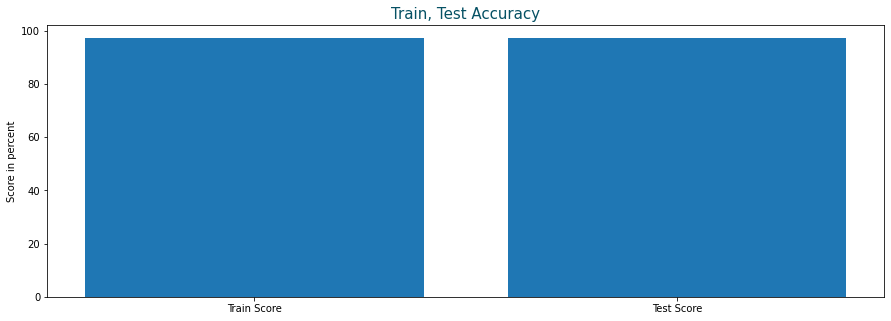

In [36]:
fig = plt.figure(figsize = (15,5))
x = ['Train Score', 'Test Score']
y = [97.351246933533, 97.34985138040318] 
plt.bar(x,y)
plt.title('Train, Test Accuracy', fontsize='15', color='#065164')
plt.ylabel('Score in percent')
plt.show()

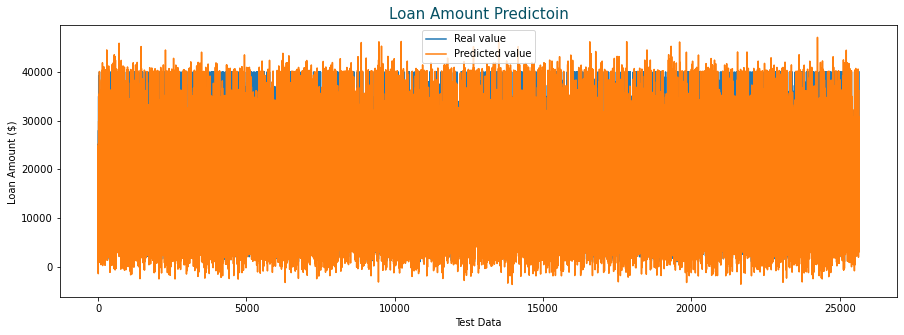

In [37]:
# visualize the predicted value with real value
plt.figure(figsize=(15, 5))

plt.plot(y_test.values, label='Real value')
plt.plot(y_prediction, label='Predicted value')

plt.title('Loan Amount Predictoin', fontsize='15', color='#065164')
plt.xlabel('Test Data')
plt.ylabel('Loan Amount ($) ')
plt.legend()
plt.show()

In [38]:
#set it as dataframe
prediction_values = pd.DataFrame(list(zip(y_prediction, y_test)), columns=['predicted_loan_amount', 
                                                                           'real_loan_amount'])

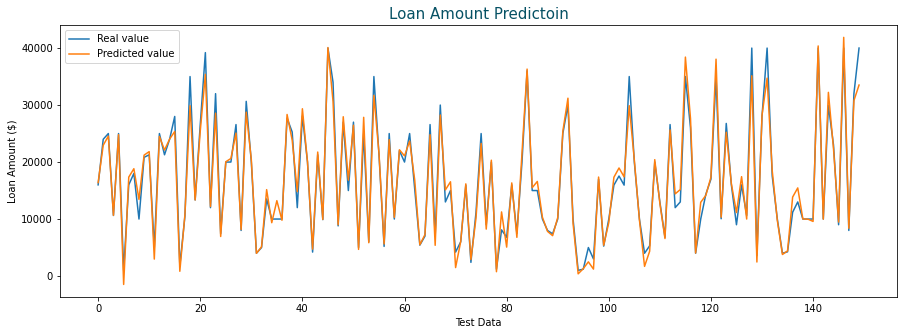

In [40]:
plt.figure(figsize=(15, 5))

plt.plot(y_test[0:150].values, label='Real value')
plt.plot(prediction_values['predicted_loan_amount'][0:150].values, label='Predicted value')

plt.title('Loan Amount Predictoin',fontsize='15', color='#065164')
plt.xlabel('Test Data')
plt.ylabel('Loan Amount ($)')
plt.legend()
plt.show()

In [42]:
print(prediction_values['predicted_loan_amount'])
print(prediction_values['real_loan_amount'])

0        16396.121971
1        22950.377723
2        24550.375698
3        10650.732753
4        24801.629027
             ...     
25647    12055.253971
25648    22417.981220
25649    24718.809939
25650    20733.820452
25651    36145.035210
Name: predicted_loan_amount, Length: 25652, dtype: float64
0        16000
1        24000
2        25000
3        10625
4        25000
         ...  
25647    12000
25648    23150
25649    25000
25650    20000
25651    40000
Name: real_loan_amount, Length: 25652, dtype: int64
